# Speed dating data analysis

## Les activités et intérêts en commun sont-ils plus importants qu'une origine commune ?

* Data engineering
* Visualisation rapide des catégories de personnes dans le dataset

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from math import isnan
import plotly.graph_objects as go

In [2]:
df_speed = pd.read_csv('Speed Dating Data.csv')

In [4]:
df_speed.head()

,iid,id,gender,idg,condtn,wave,round,position,positin1,order,...,attr3_3,sinc3_3,intel3_3,fun3_3,amb3_3,attr5_3,sinc5_3,intel5_3,fun5_3,amb5_3
0,1,1.0,0,1,1,1,10,7,NaN,4,...,5.0,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN
1,1,1.0,0,1,1,1,10,7,NaN,3,...,5.0,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN
2,1,1.0,0,1,1,1,10,7,NaN,10,...,5.0,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN
3,1,1.0,0,1,1,1,10,7,NaN,5,...,5.0,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN
4,1,1.0,0,1,1,1,10,7,NaN,7,...,5.0,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN


In [9]:
df_speed['gender'].value_counts()

1    4194
0    4184
Name: gender, dtype: int64

In [251]:
df_speed.describe()

,iid,id,gender,idg,condtn,wave,round,position,positin1,order,...,attr3_3,sinc3_3,intel3_3,fun3_3,amb3_3,attr5_3,sinc5_3,intel5_3,fun5_3,amb5_3
count,8378.000000,8377.000000,8378.000000,8378.000000,8378.000000,8378.000000,8378.000000,8378.000000,6532.000000,8378.000000,...,3974.000000,3974.000000,3974.000000,3974.000000,3974.000000,2016.000000,2016.000000,2016.000000,2016.000000,2016.000000
mean,283.675937,8.960248,0.500597,17.327166,1.828837,11.350919,16.872046,9.042731,9.295775,8.927668,...,7.240312,8.093357,8.388777,7.658782,7.391545,6.810020,7.615079,7.932540,7.155258,7.048611
std,158.583367,5.491329,0.500029,10.940735,0.376673,5.995903,4.358458,5.514939,5.650199,5.477009,...,1.576596,1.610309,1.459094,1.744670,1.961417,1.507341,1.504551,1.340868,1.672787,1.717988
min,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,5.000000,1.000000,1.000000,1.000000,...,2.000000,2.000000,3.000000,2.000000,1.000000,2.000000,2.000000,4.000000,1.000000,1.000000
25%,154.000000,4.000000,0.000000,8.000000,2.000000,7.000000,14.000000,4.000000,4.000000,4.000000,...,7.000000,7.000000,8.000000,7.000000,6.000000,6.000000,7.000000,7.000000,6.000000,6.000000
50%,281.000000,8.000000,1.000000,16.000000,2.000000,11.000000,18.000000,8.000000,9.000000,8.000000,...,7.000000,8.000000,8.000000,8.000000,8.000000,7.000000,8.000000,8.000000,7.000000,7.000000
75%,407.000000,13.000000,1.000000,26.000000,2.000000,15.000000,20.000000,13.000000,14.000000,13.000000,...,8.000000,9.000000,9.000000,9.000000,9.000000,8.000000,9.000000,9.000000,8.000000,8.000000
max,552.000000,22.000000,1.000000,44.000000,2.000000,21.000000,22.000000,22.000000,22.000000,22.000000,...,12.000000,12.000000,12.000000,12.000000,12.000000,10.000000,10.000000,10.000000,10.000000,10.000000


## Transformation des indices en texte

In [252]:
hf_dict = {0 : 'Femme', 1 : 'Homme'}
df_speed['gender'] = df_speed['gender'].apply(lambda x: hf_dict.get(x, "Inconnu"))
print(df_speed['gender'])

0       Femme
1       Femme
2       Femme
3       Femme
4       Femme
        ...  
8373    Homme
8374    Homme
8375    Homme
8376    Homme
8377    Homme
Name: gender, Length: 8378, dtype: object


In [253]:
race_dict = {1 : 'African American', 2 : 'Européen', 3:'Hispanique', 4:'Asiatique',
        5:'Native American', 6:'Autre'}
df_speed['race'] = df_speed['race'].apply(lambda x: race_dict.get(x, "Inconnu"))
print(df_speed['race'])

0       Asiatique
1       Asiatique
2       Asiatique
3       Asiatique
4       Asiatique
          ...    
8373     Européen
8374     Européen
8375     Européen
8376     Européen
8377     Européen
Name: race, Length: 8378, dtype: object


## Les données comportent des doublons, on les supprime par <code>iid</code> pour avoir un aperçu de chaque participant

In [254]:
df_cleaned = df_speed.drop_duplicates('iid').copy()
nb_participants = len(df_cleaned)
hf_count = df_cleaned['gender'].value_counts()

## Distribution des âges des participants


Il y a au total 551 participants, dont 274 femmes et 277 hommes.



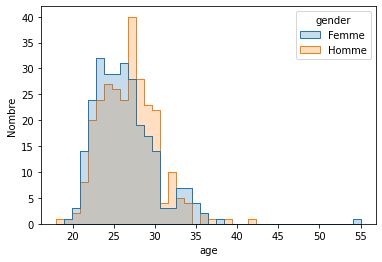

In [255]:
age_histplot = sns.histplot(x='age', hue='gender', data=df_cleaned, element='step')
plt.ylabel('Nombre')
print('\nIl y a au total {} participants, dont {} femmes et {} hommes.\n'.format(nb_participants, hf_count['Femme'], hf_count["Homme"]))

## Origine des participants


Les participants sont pour : 55% des Européens, 25% des Asiatiques, 8% des Hispaniques et 5% des African American



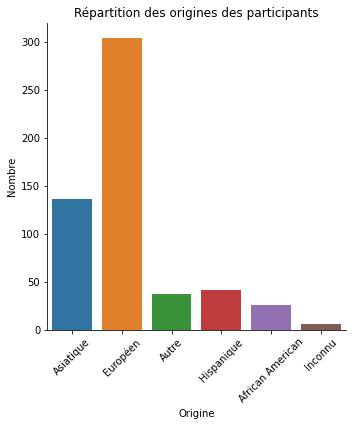

In [256]:
race_plot = sns.catplot(x='race', data=df_cleaned, kind='count')
race_plot.set_xticklabels(rotation=45)
plt.xlabel('Origine')
plt.ylabel('Nombre')
plt.title('Répartition des origines des participants')
race_count = df_cleaned['race'].value_counts().apply(lambda x:(x/nb_participants))
print('\nLes participants sont pour : {:.0%} des Européens, {:.0%} des Asiatiques, {:.0%} des Hispaniques et {:.0%} des African American\n'
      .format(race_count['Européen'],race_count['Asiatique'], race_count['Hispanique'], race_count['African American']))


Le nombre d'hommes et de femmes est globalement équilibré selon leur origine



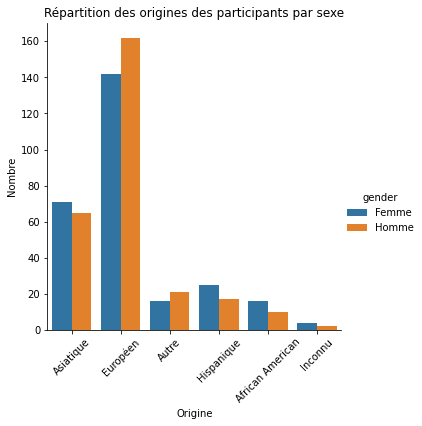

In [257]:
race_plot_gender = sns.catplot(x='race',hue='gender', data=df_cleaned, kind='count')
race_plot_gender.set_xticklabels(rotation=45)
plt.xlabel('Origine')
plt.ylabel('Nombre')
plt.title('Répartition des origines des participants par sexe')
print("\nLe nombre d'hommes et de femmes est globalement équilibré selon leur origine\n")

## Activités et interêts des participants :

In [258]:
activites = ['sports','tvsports','exercise','dining','museums','art','hiking',
              'gaming','clubbing','reading','tv','theater','movies', 'concerts',
              'music','shopping','yoga']


Les femmes sont globalement plus intéressées par les activités en général, les hommes sont quant à eux plus interessés par le sport, regarder le sport à la TV, et les jeux videos.



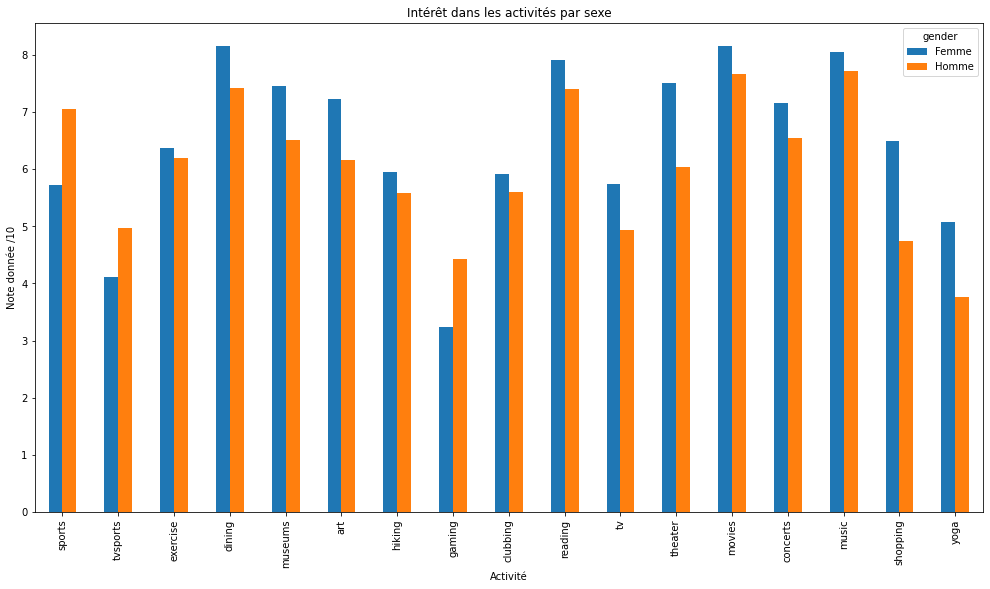

In [259]:
interests_gender = df_cleaned[['gender'] + activites].groupby('gender').mean().transpose()
interests_gender_mean = interests_gender.mean()
interests_gender_plot = interests_gender.plot(kind='bar', figsize=(17,9))
plt.title("Intérêt dans les activités par sexe")
plt.ylabel("Note donnée /10")
plt.xlabel("Activité")
print("\nLes femmes sont globalement plus intéressées par les activités en général, les hommes sont quant à eux plus interessés par le sport, regarder le sport à la TV, et les jeux videos.\n")
plt.show()

In [278]:
interests_race = df_cleaned[['race'] + activites].groupby('race', as_index=False).mean()
interests_race_plot = go.Figure()
buttons=[]

for i in activites:
    interests_race_plot.add_trace(go.Pie(labels=interests_race['race'],
                         values=interests_race[i],
                         visible=True, hole=0.15,  texttemplate="%{value:.2f}<br>%{percent}", textinfo='percent+value'))
    buttons.append(dict(label=i,args = [{'label':[interests_race['race']],'values':[interests_race[i]]}]))
    
interests_race_plot.update_layout(updatemenus=[{"buttons": buttons, "direction": "down", "x": 0, "y": 1.3}], 
        title={'text': "Répartition des notes attribuées aux activités par origine",'x':0.475,'y':0.9},
        font=dict(family="Arial, monospace",size=13))
interests_race_plot.show()

In [ ]:
fig.add_trace(go.Scatter(x=df1[‘Week_x’], y=df1[‘Week_y’], mode=‘lines’, marker=dict(symbol=“line-ne”),line=dict(color=‘red’,width=2), name=‘1 week’))

## Corrélation entre les intérêts et les match


Plus les interêts entre les deux participants sont corrélés, plus la variable 'int_corr' se rapproche de 1.
Ainsi, on peut voir une légère influence positive de cette variable sur les match.



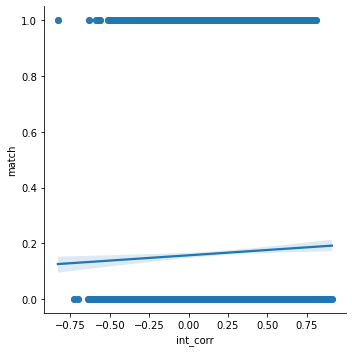

In [261]:
sns.lmplot(data=df_speed,x='int_corr',y='match')
print("\nPlus les interêts entre les deux participants sont corrélés, plus la variable 'int_corr' se rapproche de 1.\n"
      "Ainsi, on peut voir une légère influence positive de cette variable sur les match.\n")

## Quelle est l'importance de l'origine dans le cas d'un match entre deux personnes ?
Qu'en disent les participants avant de rencontrer les partenaires ? 

In [262]:
imprace_avg = df_speed[['imprace','gender','race']].groupby(["race",'gender'], as_index=False).mean()


Les Européens accordent plus d'importance à l'origine du partenaire, contrairement aux Hispaniques. Une tendance montre que les femmes sont aussi plus attachées à l'origine du partenaire que les hommes



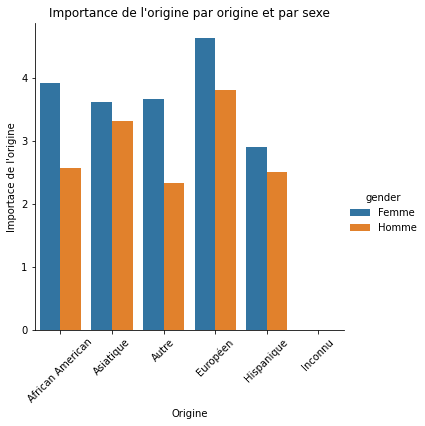

In [263]:
imprace_avg_plot = sns.catplot(y='imprace', x='race', data=imprace_avg, kind='bar', hue='gender')
imprace_avg_plot.set_xticklabels(rotation=45)
imprace_avg_plot.set(xlabel='Origine', ylabel="Importace de l'origine", title="Importance de l'origine par origine et par sexe")
print("\nLes Européens accordent plus d'importance à l'origine du partenaire, contrairement aux Hispaniques. Une tendance montre que les femmes sont aussi plus "
      "attachées à l'origine du partenaire que les hommes\n")

In [264]:
imprace_gender_avg = df_speed[['imprace','gender']].groupby('gender', as_index=False).mean()


L'origine du partenaire semble être effectivement plus important pour une femme que pour un homme, d'après les notations.



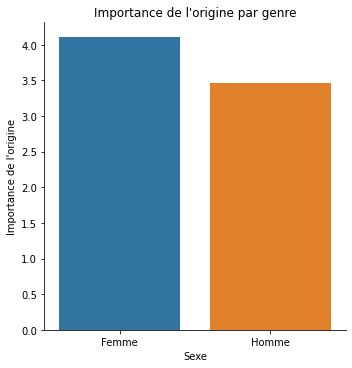

In [265]:
imprace_gender_plot = sns.catplot(data=imprace_gender_avg, kind='bar', y='imprace', x='gender')
imprace_gender_plot.set(ylabel="Importance de l'origine", xlabel="Sexe", title="Importance de l'origine par genre")
print("\nL'origine du partenaire semble être effectivement plus important pour une femme que pour un homme, d'après les notations.\n")

## Dans les faits, quelle est la vérité sur l'importance de l'origine ?
Nous allons étudier l'impact réel d'être de la même origine dans les réponses obtenues pour un date, et non pas selon les déclarations.

In [266]:
race_true_decision = df_speed[['samerace','race','dec']].groupby(['samerace','race'], as_index=False).mean()


On constate une importante augmentation de la probabilité qu'une personne 'African American' dise oui si la personne en face partage son origine. C'est le cas dans une moindre mesure pour les autres origines à l'exception des asiatiques où l'on remarque à l'inverse une baisse



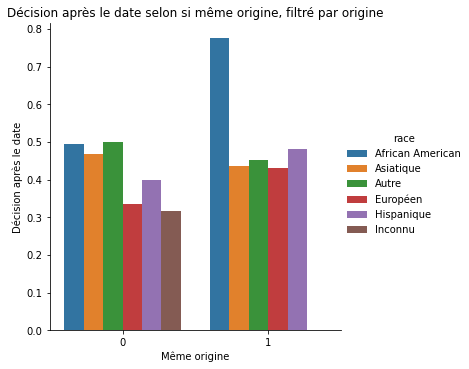

In [267]:
race_true_decision_plot = sns.catplot(data= race_true_decision, kind='bar', x='samerace', y='dec', hue='race')
race_true_decision_plot.set(ylabel='Décision après le date', xlabel='Même origine', title='Décision après le date selon si même origine, filtré par origine')
print("\nOn constate une importante augmentation de la probabilité qu'une personne 'African American' dise oui si la personne en face partage son origine."
      " C'est le cas dans une moindre mesure pour les autres origines à l'exception des asiatiques où l'on remarque à l'inverse une baisse\n")

## Existe-t-il une différence entre les hommes et les femmes pour ce critère ?

In [268]:
race_true_decision_bis = df_speed[['samerace','race','dec','gender']].groupby(['samerace','race','gender'], as_index=False).mean()
race_femme_true_decision = race_true_decision_bis[race_true_decision_bis['gender']  == 'Femme']
race_homme_true_decision = race_true_decision_bis[race_true_decision_bis['gender']  == 'Homme']


Plusieurs constats :
- Les femmes d'origine Afro-Américaine semblent être plus enclines à dire oui à une personne de la même origine.
- Les femmes de façon générale répondent plus favorablement lorsque leur partenaire est de la même origine, ce qui reflète les résultats précédents sur l'importance de l'origine.
- Enfin, de façon générale, les hommes donnent une réponse positive à un date plus fréquemment que les femmes.



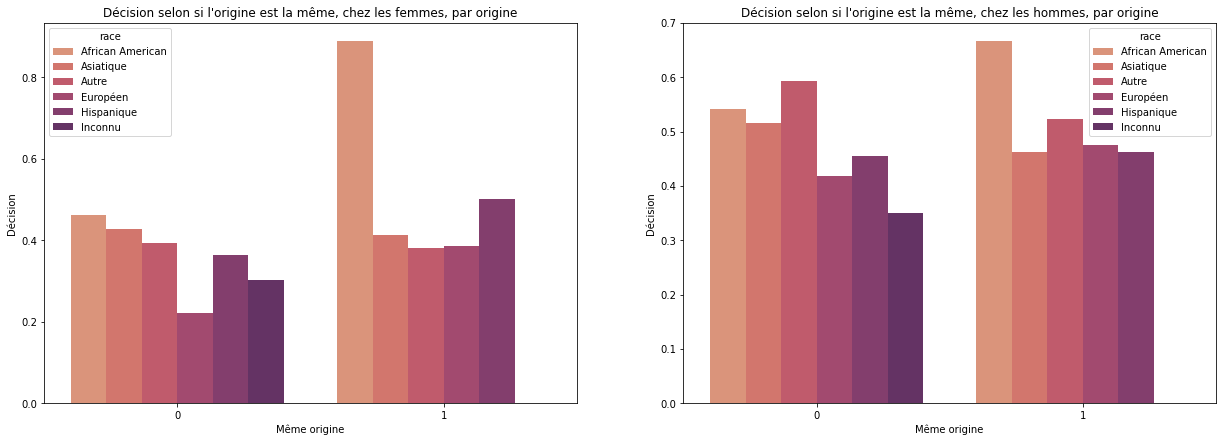

In [269]:
fig, ax = plt.subplots(1,2, figsize=(21,7))
race_femme_true_decision_plot = sns.barplot(data=race_femme_true_decision, x='samerace', hue='race', y='dec', ax=ax[0] , palette = "flare")
race_femme_true_decision_plot.set(ylabel = "Décision", xlabel='Même origine', title="Décision selon si l'origine est la même, chez les femmes, par origine")
race_homme_true_decision_plot = sns.barplot(data=race_homme_true_decision, x='samerace', y='dec', hue='race', ax=ax[1], palette = "flare")
race_homme_true_decision_plot.set(ylabel = "Décision", xlabel='Même origine', title="Décision selon si l'origine est la même, chez les hommes, par origine")
print("\nPlusieurs constats :\n"
        "- Les femmes d'origine Afro-Américaine semblent être plus enclines à dire oui à une personne de la même origine.\n"
        "- Les femmes de façon générale répondent plus favorablement lorsque leur partenaire est de la même origine, ce qui reflète les résultats précédents sur l'importance de l'origine.\n"
        "- Enfin, de façon générale, les hommes donnent une réponse positive à un date plus fréquemment que les femmes.\n")

## Quel est l'impact réel de l'origine sur le taux de match ?


Au final, il n'y a pas réellement d'influence persceptible du fait d'être de la même origine sur le taux de match.



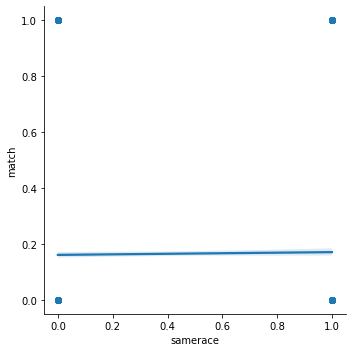

In [270]:
sns.lmplot(data=df_speed,x='samerace',y='match')
print("\nAu final, il n'y a pas réellement d'influence persceptible du fait d'être de la même origine sur le taux de match.\n")

## Bilan

En modélisant la matrice de corrélation associée à la variable dec, correspondant au fait que la personne qui reçoive le partenaire dise oui ou non, le résultat montre une très faible corrélation avec les variables d'interêt et d'origine.
La corrélation semble beaucoup plus marquée avec la variable attr (attirance).
Ce qui veut dire que les personnes au final ne s'interessent que peu à l'origine de la personne et aux interêts partagés, mais plus à des critères physiques


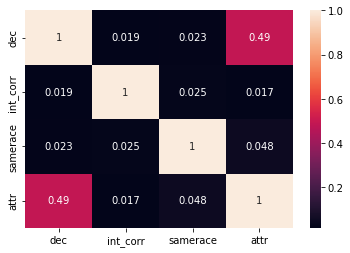

In [271]:
corr_race_interests = df_speed[['dec','int_corr','samerace','attr']].corr()
sns.heatmap(corr_race_interests, annot=True)
print("En modélisant la matrice de corrélation associée à la variable dec, correspondant au fait que la personne qui reçoive le partenaire dise oui ou non, le résultat montre une très faible corrélation "
      "avec les variables d'interêt et d'origine.\n"
      "La corrélation semble beaucoup plus marquée avec la variable attr (attirance).\n"
      "Ce qui veut dire que les personnes au final ne s'interessent que peu à l'origine de la personne et aux interêts partagés, mais plus à des critères physiques")